# **Options Pricing using Deep Learning**

Anvesh Gandotra (2K22/MC/25), Arav Jain (2K22/MC/26)


Objective:-To predict options prices using - a Deep Learning model so as to achive high accuracy compared to traditional pricing models.

Output:-


*   A large dataset with option prices and other required parameters.
*   An efficient Deep Learning model built for options price prediction, each for Call and Put options.


Reference:-

A. Ke and A. Yang, “Option pricing with deep learning,” 2019.

## **Importing required libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/OPTIONS')

Mounted at /content/drive


In [ ]:
# Importing required libraries

from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras import backend
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import log, sqrt, pi, exp
import math
import statistics

## **Importing the dataset**

The dataset contains all the Asian Paints (ASIANPAINT) Ltd. options traded from 2017-2020 (4 years).

All the options in this dataset are European options. No American options were traded in the selected timeframe.

The Call Options dataset is `df_call` and Put Options dataset is `df_put`.

In [ ]:
# Call options

df_call = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/OPTIONS /ASIANPAINT_Dataset.xlsx', sheet_name = [0, 2, 4, 6])
df_call = pd.concat([df_call[0], df_call[2], df_call[4], df_call[6]], axis=0)
df_call = df_call.drop(columns=['Date', 'Expiry'])

In [ ]:
# Put options

df_put = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/OPTIONS /ASIANPAINT_Dataset.xlsx', sheet_name = [1, 3, 5, 7])
df_put = pd.concat([df_put[1], df_put[3], df_put[5], df_put[7]], axis=0)
df_put = df_put.drop(columns=['Date', 'Expiry'])

## **Call Options**

### **Deep Learning Model**

In [ ]:
# Normalizing X (input variables)

scaler = MinMaxScaler()
norm_df_call = scaler.fit_transform(df_call[['t', 'strike_price', 'underlying_value', 'sigma', 'r']], df_call['close'])
norm_df_call = pd.DataFrame(norm_df_call)
norm_df_call.rename(columns = {0:'t', 1:'strike_price', 2:'underlying_value', 3:'sigma', 4:'r'}, inplace = True)

In [ ]:
# Splitting the dataset into testing and training sets
# T, Strike Price, Underlying Price are the X parameters
#Split Ratio = 80 (train) - 20 (test)

X_train, X_test, y_train, y_test = \
train_test_split(norm_df_call[['t', 'strike_price', 'underlying_value', 'sigma', 'r']], df_call['close'], test_size = 0.2, random_state = 42)

In [ ]:
# Defining Variables
n_units = 400
layers = 4
n_batch = 128

In [ ]:
# EarlyStopping Callback

cb_call = tf.keras.callbacks.EarlyStopping(\
    monitor = 'val_loss',\
    patience = 5,\
    restore_best_weights = True)

In [ ]:
# Learning Rate Callback

LrCb_call = tf.keras.callbacks.ReduceLROnPlateau(\
    monitor = 'val_loss',\
    factor = 0.2,\
    patience = 3)

In [ ]:
# Deep Learning model

model = Sequential()
model.add(Dense(n_units, input_dim = X_train.shape[1]))
model.add(LeakyReLU())

for i in range(layers - 1):
    model.add(Dense(n_units))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

model.add(Dense(1, activation = 'relu'))

model.compile(loss = 'mse', optimizer = Adam())

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 488,801 (1.86 MB)

 Trainable params: 486,401 (1.86 MB)

 Non-trainable params: 2,400 (9.38 KB)

In [ ]:
# Fitting our data to the model

n_epochs = 40
history = model.fit(X_train, y_train, batch_size = n_batch, epochs = n_epochs, validation_split = 0.01,\
                    callbacks = [cb_call, LrCb_call], verbose = 1)

Epoch 1/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1328.9529 - val_loss: 1153.5931 - learning_rate: 4.0000e-05
Epoch 2/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1278.5101 - val_loss: 1174.6985 - learning_rate: 4.0000e-05
Epoch 3/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1242.7354 - val_loss: 1183.9652 - learning_rate: 4.0000e-05
Epoch 4/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1268.6251 - val_loss: 1148.6379 - learning_rate: 4.0000e-05
Epoch 5/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1291.1052 - val_loss: 1212.6060 - learning_rate: 4.0000e-05
Epoch 6/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1290.9692 - val_loss: 1182.7661 - learning_rate: 4.0000e-05
Epoch 7/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1286.7683 - val_loss: 1154.3553 - learning_rate: 4.0000e-05
Epoch 8/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1250.4485 - val_loss: 1149.7404 - learning_rate: 8.0000e-06
Epoch 9/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Predicting values for testing set

y_pred = model.predict(X_test)

700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
# Evaluating model performance - MSE

MSE_call = (y_test.values - y_pred.reshape(y_pred.shape[0]))
DL_MSE_call = np.mean(np.square(MSE_call))
print(DL_MSE_call)

992.8697658755639


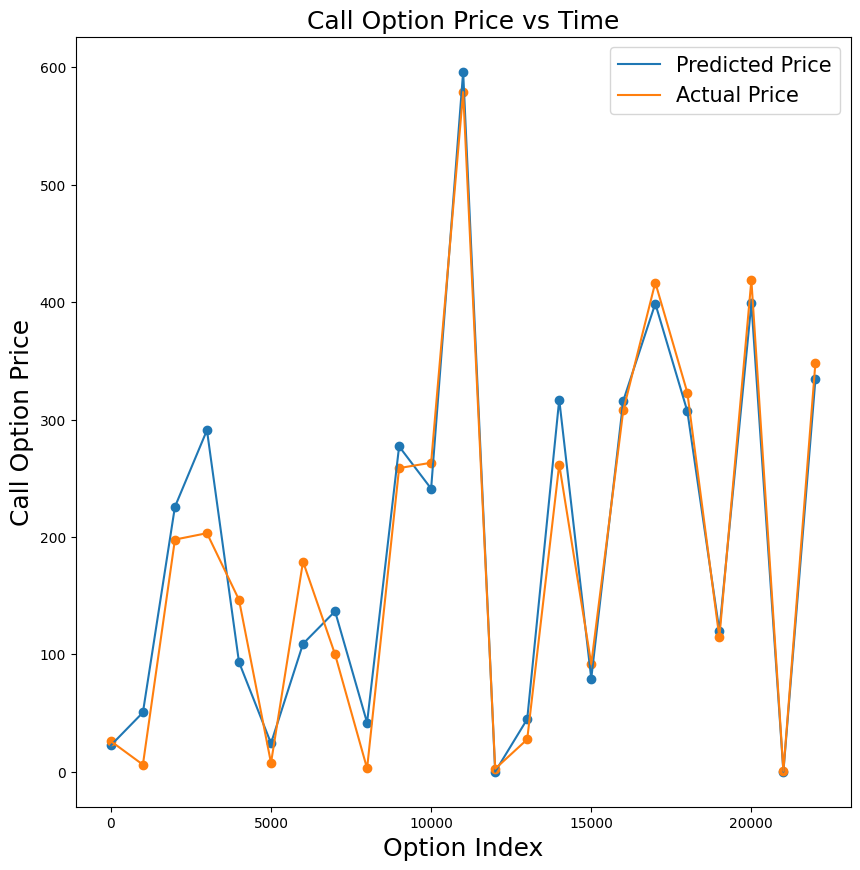

In [ ]:
# Graph

y_scale = list(range(1, len(y_test.values)+1))
y_selected_points = []
DL_selected_points = []
Actual_selected_points = []

plt.figure(figsize = (10, 10))
for i in range(len(y_scale)):
  if i%1000 == 0:
    y_selected_points.append(y_scale[i])
    DL_selected_points.append(y_pred.reshape(y_pred.shape[0])[i])
    Actual_selected_points.append(y_test.values[i])

plt.plot(y_selected_points, DL_selected_points)
plt.plot(y_selected_points, Actual_selected_points)
plt.scatter(y_selected_points, DL_selected_points)
plt.scatter(y_selected_points, Actual_selected_points)
plt.xlabel('Option Index', fontsize=18)
plt.ylabel('Call Option Price', fontsize=18)
plt.title('Call Option Price vs Time', fontsize=18)
plt.legend(["Predicted Price" , "Actual Price"], prop={"size":15})
plt.show()

## **Put Options**

### **Deep Learning Model**

In [ ]:
scaler1 = MinMaxScaler()
norm_df_put = scaler1.fit_transform(df_put[['t', 'strike_price', 'underlying_value', 'sigma', 'r']], df_put['close'])
norm_df_put = pd.DataFrame(norm_df_put)
norm_df_put.rename(columns = {0:'t', 1:'strike_price', 2:'underlying_value', 3:'sigma', 4:'r'}, inplace = True)

In [ ]:
# Splitting the dataset into testing and training sets
# T, Strike Price, Underlying Price are the X parameters
# Close is the y value
#Split Ratio = 80 (train) - 20 (test)

X_train, X_test, y_train, y_test = \
train_test_split(norm_df_put[['t', 'strike_price', 'underlying_value', 'sigma', 'r']], df_put['close'], test_size = 0.2, random_state = 42)

In [ ]:
# Defining Variables

n_units = 400
layers = 5
n_batch = 128

In [ ]:
# EarlyStopping Callback

cb_put = tf.keras.callbacks.EarlyStopping(\
    monitor = 'val_loss',\
    patience = 5,\
    restore_best_weights = True)

In [ ]:
# Learning Rate Callback

LrCb_put = tf.keras.callbacks.ReduceLROnPlateau(\
    monitor = 'val_loss',\
    factor = 0.2,\
    patience = 3)

In [ ]:
# Deep Learning model

model = Sequential()
model.add(Dense(n_units, input_dim = X_train.shape[1]))
model.add(LeakyReLU())

for i in range(layers - 1):
    model.add(Dense(n_units))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

model.add(Dense(1, activation = 'relu'))

model.compile(loss = 'mse', optimizer = Adam())

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 400)                 │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,801 (2.48 MB)

 Trainable params: 647,601 (2.47 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [ ]:
# Fitting our data to the model

n_epochs = 40
history = model.fit(X_train, y_train, batch_size = n_batch, epochs = n_epochs, validation_split = 0.01,callbacks = [cb_put, LrCb_put], verbose = 1)


history = model.fit(X_train, y_train, batch_size = n_batch, epochs = n_epochs, validation_split = 0.01,\
                    callbacks = [cb_call, LrCb_call], verbose = 1)

Epoch 1/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2667.8164 - val_loss: 2223.4534 - learning_rate: 0.0010
Epoch 2/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2321.3958 - val_loss: 2735.3108 - learning_rate: 0.0010
Epoch 3/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2159.5024 - val_loss: 2219.0942 - learning_rate: 0.0010
Epoch 4/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2110.7031 - val_loss: 1720.8379 - learning_rate: 0.0010
Epoch 5/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2058.2949 - val_loss: 2375.9822 - learning_rate: 0.0010
Epoch 6/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2052.6145 - val_loss: 2003.6631 - learning_rate: 0.0010
Epoch 7/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1933.8809 - val_loss: 2764.4934 - learning_rate: 0.0010
Epoch 8/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1702.1853 - val_loss: 1359.5865 - learning_rate: 2.0000e-04
Epoch 9/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1638.144

In [ ]:
# Predicting values for testing set

y_pred = model.predict(X_test)

700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
# Evaluating model performance - MSE

MSE_put = (y_test.values - y_pred.reshape(y_pred.shape[0]))
DL_MSE_put = np.mean(np.square(MSE_put))
print(DL_MSE_put)

1091.8987784473038


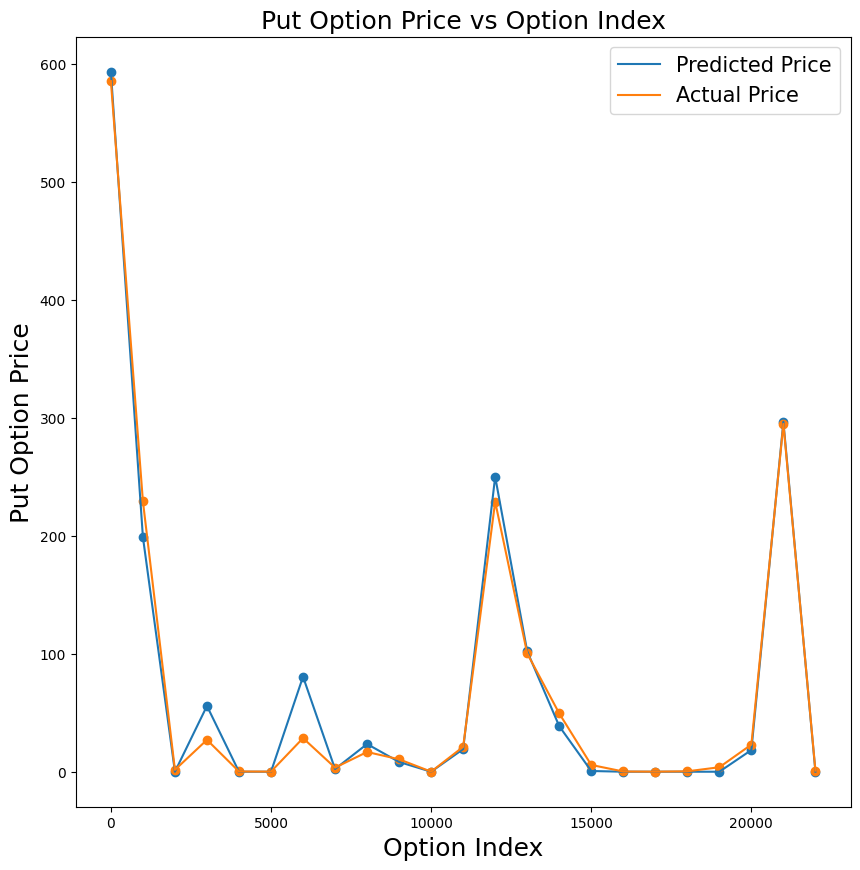

In [ ]:
# Graph

y_scale = list(range(1, len(y_test.values)+1))
y_selected_points = []
DL_selected_points = []
Actual_selected_points = []

plt.figure(figsize = (10, 10))
for i in range(len(y_scale)):
  if i%1000 == 0:
    y_selected_points.append(y_scale[i])
    DL_selected_points.append(y_pred.reshape(y_pred.shape[0])[i])
    Actual_selected_points.append(y_test.values[i])

plt.plot(y_selected_points, DL_selected_points)
plt.plot(y_selected_points, Actual_selected_points)
plt.scatter(y_selected_points, DL_selected_points)
plt.scatter(y_selected_points, Actual_selected_points)
plt.xlabel('Option Index', fontsize=18)
plt.ylabel('Put Option Price', fontsize=18)
plt.title('Put Option Price vs Option Index', fontsize=18)
plt.legend(["Predicted Price" , "Actual Price"], prop={"size":15})
plt.show()